<a href="https://colab.research.google.com/github/jsebastianbarretoj99/Asignatura_Inteligencia_Artificial_5607/blob/master/Trabajo_Semana_03/Taller_Regresion_LIneal_juan_barreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Project: Titanic - Machine learning from disaster


Student: Juan Sebastián Barreto Jimenez

<img src="Images/Titanic_problem.png" width="600"> 

Competition link in Kaggle: https://www.kaggle.com/c/titanic/

## Libraries

In [49]:
# Imports of the necessary libraries are carried out
import numpy as np 
import pandas as pd 
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Data preparation

### Load data

In [50]:
# Load data
data_df = pd.read_csv("train.csv")

In [51]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Remove irrelevant data

In [19]:
# Remove irrelevant data for prediction
data_df = data_df.drop (['PassengerId','Name','Ticket'], axis = 1)

In [20]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None


### Clean data of NaN

In [21]:
# Delete column where NaN is more than half of the data.
remove_attribute_nan = []
cant_data = data_df.shape[0]
for key, data in data_df.isnull().sum().items():
    if data >= data_df.shape[0]/2:
        remove_attribute_nan.append(key)
data_df = data_df.drop (remove_attribute_nan, axis = 1)

# Complete the two values NaN of Embarked with the mode
cont_embarked = {'C':0, 'Q':0, 'S':0}
position_nan = []
cont_position = 0
embarked_slice = data_df['Embarked'].copy()
for data in embarked_slice:
    if data == 'C':
        cont_embarked['C'] += 1
    elif data == 'Q':
        cont_embarked['Q'] += 1
    elif data == 'S':
        cont_embarked['S'] += 1
    elif math.isnan(data):
        position_nan.append(cont_position)
    cont_position += 1
major = 0
for key, cont in cont_embarked.items():
    if cont > major:
        embarked_mode = key
        major = cont
for i in position_nan:
    embarked_slice[i] = embarked_mode

data_df['Embarked'] = embarked_slice

# Complete the 177 values NaN of age with random values with mean and standard deviation of the rest of data
age_slice = data_df['Age'].copy()
mean = age_slice.mean()
std = age_slice.std()
nan_values = age_slice.isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = nan_values)
cont_position = 0
position_nan.clear()

for data in age_slice:
    if math.isnan(data):
        position_nan.append(cont_position)
    cont_position += 1

for i in range(len(position_nan)):
    age_slice[position_nan[i]] = rand_age[i]

data_df['Age'] = age_slice

In [22]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


### Convert data

In [23]:
# Convert sex: female = 0 - male = 1
genders = {"female": 0, "male": 1}
data_df['Sex'] = data_df['Sex'].map(genders)
data_df['Sex'] = data_df['Sex'].astype(int)
# Convert Embarked
embarkeds = {'C': 0, 'Q': 1, 'S': 2}
data_df['Embarked'] = data_df['Embarked'].map(embarkeds)
data_df['Embarked'] = data_df['Embarked'].astype(int)
# Convert Ages to int
data_df['Age'] = data_df['Age'].astype(int)
# Convert Fare to int
data_df['Fare'] = data_df['Fare'].astype(int)

In [24]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB
None


### Creating new features

In [25]:
# Number of relatives and Alone [1 - not alone | 0 - alone]
relatives = []
alone = []
siblings = data_df['SibSp'].copy()
parents = data_df['Parch'].copy()

for i in range(cant_data):
    sum_relatives = siblings[i] + parents[i]
    relatives.append(sum_relatives)
    if sum_relatives == 0:
        alone.append(0)
    else:
        alone.append(1)

data_df['Relatives'] = relatives
data_df['Alone'] = alone
data_df = data_df.drop (['SibSp','Parch'], axis = 1)

# Change name of Labels
survived = data_df['Survived'].copy()
data_df['Y_Labels_Survived'] = survived
data_df = data_df.drop (['Survived'], axis = 1)

In [26]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pclass             891 non-null    int64
 1   Sex                891 non-null    int64
 2   Age                891 non-null    int64
 3   Fare               891 non-null    int64
 4   Embarked           891 non-null    int64
 5   Relatives          891 non-null    int64
 6   Alone              891 non-null    int64
 7   Y_Labels_Survived  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB
None


### Creating groups

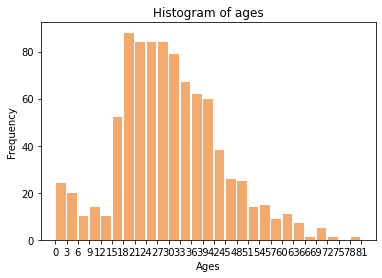

In [27]:
# Analysis of age
age_slice = data_df['Age'].copy()
intervals = range(min(age_slice), max(age_slice) + 2,3)
plt.hist(x=age_slice, bins=intervals, color='#F2AB6D', rwidth=0.85)
plt.title('Histogram of ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.xticks(intervals)
plt.show()

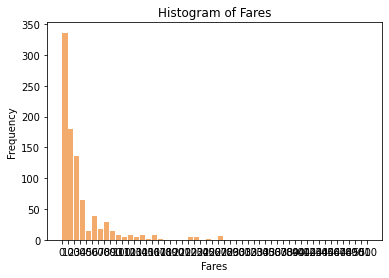

In [28]:
# Analysis of fare
fare_slice = data_df['Fare'].copy()
intervals = range(min(fare_slice), max(fare_slice) + 2,10)
plt.hist(x=fare_slice, bins=intervals, color='#F2AB6D', rwidth=0.85)
plt.title('Histogram of Fares')
plt.xlabel('Fares')
plt.ylabel('Frequency')
plt.xticks(intervals)
plt.show()

In [29]:
# Groups for ages: six groups
# 0 - 0 -> 18
# 1 - 18 -> 24
# 2 - 24 -> 30
# 3 - 30 -> 36
# 4 - 36 -> 42
# 5 - 42 -> 81
age_slice = data_df['Age'].copy()
age_slice_new = []
for age in age_slice:
    if age < 18:
        age_slice_new.append(0)
    elif age >= 18 and age < 24:
        age_slice_new.append(1)
    elif age >= 24 and age < 30:
        age_slice_new.append(2)
    elif age >= 30 and age < 36:
        age_slice_new.append(3)
    elif age >= 36 and age < 42:
        age_slice_new.append(4)
    elif age >= 42:
        age_slice_new.append(5)

data_df['Age'] = age_slice_new

# Groups for fares: six groups
# 0 - 0 -> 10
# 1 - 10 -> 30
# 2 - 30 -> oo
fare_slice = data_df['Fare'].copy()
fare_slice_new = []
for fare in fare_slice:
    if fare < 10:
        fare_slice_new.append(0)
    elif fare >= 10 and fare < 30:
        fare_slice_new.append(1)
    elif fare >= 30:
        fare_slice_new.append(2)

data_df['Fare'] = fare_slice_new

In [30]:
print(data_df.info())
data_df.to_csv('data_titanic.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pclass             891 non-null    int64
 1   Sex                891 non-null    int64
 2   Age                891 non-null    int64
 3   Fare               891 non-null    int64
 4   Embarked           891 non-null    int64
 5   Relatives          891 non-null    int64
 6   Alone              891 non-null    int64
 7   Y_Labels_Survived  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB
None


## Modelling

### Load data

In [32]:
# Load data
data_df = pd.read_csv("data_titanic.csv")
y_data = data_df['Y_Labels_Survived'].to_numpy()
data_df = data_df.drop (['Y_Labels_Survived'], axis = 1)

X_data = data_df.to_numpy()

# Separate dataset in train and test|
X_train_p, X_test_p, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0)
# Normalization of data
sc = StandardScaler()
sc.fit(X_train_p)
X_train = sc.transform(X_train_p)
X_test = sc.transform(X_test_p)

#PCA
pca = PCA(n_components=6, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

### Implementation with Support Vector Machine Algorithm (SVM)

In [35]:
m_svm = svm.SVC(C=15, kernel='poly') # Create model Naive Bayes Gaussian
m_svm.fit(X_train, y_train) # Training of model
y_pred = m_svm.predict(X_test)
print("Metrics of SVM Model for Titanic Project:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of SVM Model for Titanic Project:
Accuracy: 83.24022346368714%
F1: 83.24022346368714%
MCC: 64.11510253512644%


In [34]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

#hyper_parameter_base = 1
hyper_parameter_save = []
accuracy = []
f1 = []
mcc = []

for j in kernels:
    for i in range(1,21):
        hyper_parameter = i
        hyper_parameter_save.append([j,hyper_parameter])
        m_svm = svm.SVC(C=hyper_parameter, kernel=j) # Create model Naive Bayes Gaussian
        m_svm.fit(X_train, y_train) # Training of model
        y_pred = m_svm.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred)*100)
        f1.append(f1_score(y_test, y_pred, average='micro')*100)
        mcc.append(matthews_corrcoef(y_test, y_pred)*100)

print("Maximos: ")
point_max_f1 = np.argmax(np.array(f1))
point_max_mcc = np.argmax(np.array(mcc))
print("F1: ", point_max_f1)
print("MCC: ", point_max_mcc)
print("Valor: ", hyper_parameter_save[point_max_f1])

Maximos: 
F1:  34
MCC:  34
Valor:  ['poly', 15]


### Implementation with Support Vector Machine Algorithm (SVM) with PCA

In [37]:
m_svm = svm.SVC(C=15, kernel='poly') # Create model Naive Bayes Gaussian
m_svm.fit(X_train_pca, y_train) # Training of model
y_pred = m_svm.predict(X_test_pca)
print("Metrics of SVM Model for Titanic Project:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of SVM Model for Titanic Project:
Accuracy: 69.27374301675978%
F1: 69.27374301675978%
MCC: 32.09468843573771%


### Implementation with Decision Tree Algorithm

In [38]:
clf = tree.DecisionTreeClassifier(ccp_alpha=1e-3) # Create model Decision Tree
clf.fit(X_train, y_train) # Training of model
#tree.plot_tree(clf)
y_pred = clf.predict(X_test)
print("Metrics of Decision Tree model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")
print("\nTree training:")

Metrics of Decision Tree model:
Accuracy: 84.91620111731844%
F1: 84.91620111731844%
MCC: 67.78885859702577%

Tree training:


### Implementation with Decision Tree Algorithm with PCA

In [39]:
clf = tree.DecisionTreeClassifier() # Create model Decision Tree
clf.fit(X_train_pca, y_train) # Training of model
#tree.plot_tree(clf)
y_pred = clf.predict(X_test_pca)
print("Metrics of Decision Tree model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")
print("\nTree training:")

Metrics of Decision Tree model:
Accuracy: 80.44692737430168%
F1: 80.44692737430168%
MCC: 57.97961435260035%

Tree training:


### Implementation with Gaussian Naive Bayes Algorithm

In [40]:
hyper_parameter= 1.0
gnb = GaussianNB(var_smoothing=hyper_parameter) # Create model Naive Bayes Gaussian
gnb.fit(X_train, y_train) # Training of model
y_pred = gnb.predict(X_test)
print("Metrics of Naive Bayes Gaussian Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of Naive Bayes Gaussian Model:
Accuracy: 86.59217877094973%
F1: 86.59217877094973%
MCC: 71.44059403754409%


Metrics of Naive Bayes Gaussian Model:


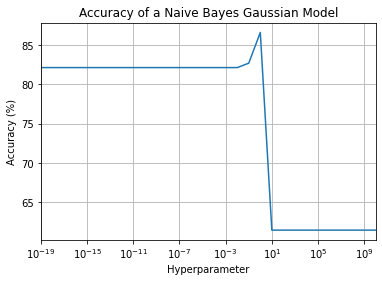

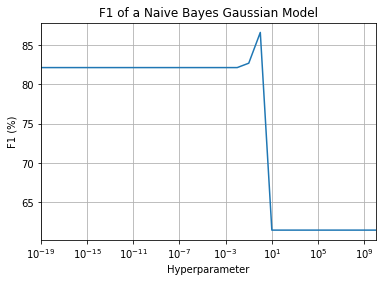

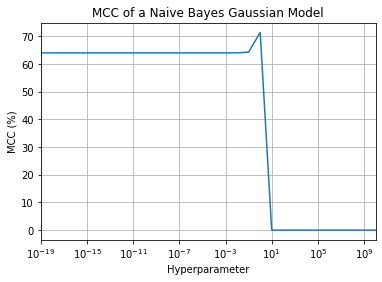

Maximos: 
F1:  19
MCC:  19
Valor:  1.0


In [41]:
hyper_parameter_base = 1e-19
hyper_parameter_save = []
accuracy = []
f1 = []
mcc = []

for i in range(100):
    hyper_parameter = hyper_parameter_base*(10**i)
    hyper_parameter_save.append(hyper_parameter)
    gnb = GaussianNB(var_smoothing=hyper_parameter) # Create model Naive Bayes Gaussian
    gnb.fit(X_train, y_train) # Training of model
    y_pred = gnb.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred)*100)
    f1.append(f1_score(y_test, y_pred, average='micro')*100)
    mcc.append(matthews_corrcoef(y_test, y_pred)*100)
print("Metrics of Naive Bayes Gaussian Model:")
# Accuracy of a Naive Bayes Gaussian Model
plt.semilogx(hyper_parameter_save, accuracy) # Plot accuracy vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('Accuracy (%)') # Set y label
plt.title('Accuracy of a Naive Bayes Gaussian Model') # Set title
plt.xlim(1e-19, 1e10) # Set x limits
plt.grid() # On grid
plt.show() # Show graph
# F1 of a Naive Bayes Gaussian Model
plt.semilogx(hyper_parameter_save, f1) # Plot F1 vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('F1 (%)') # Set y label
plt.title('F1 of a Naive Bayes Gaussian Model') # Set title
plt.xlim(1e-19, 1e10) # Set x limits
plt.grid() # On grid
plt.show() # Show graph
# MCC of a Naive Bayes Gaussian Model
plt.semilogx(hyper_parameter_save, mcc) # Plot mcc vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('MCC (%)') # Set y label
plt.title('MCC of a Naive Bayes Gaussian Model') # Set title
plt.xlim(1e-19, 1e10) # Set x limits
plt.grid() # On grid
plt.show() # Show graph

print("Maximos: ")
point_max_f1 = np.argmax(np.array(f1))
point_max_mcc = np.argmax(np.array(mcc))
print("F1: ", point_max_f1)
print("MCC: ", point_max_mcc)
print("Valor: ", hyper_parameter_save[point_max_f1])

### Implementation with Gaussian Naive Bayes Algorithm with PCA

In [42]:
hyper_parameter= 1.0
gnb = GaussianNB(var_smoothing=hyper_parameter) # Create model Naive Bayes Gaussian
gnb.fit(X_train_pca, y_train) # Training of model
y_pred = gnb.predict(X_test_pca)
print("Metrics of Naive Bayes Gaussian Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of Naive Bayes Gaussian Model:
Accuracy: 70.94972067039106%
F1: 70.94972067039106%
MCC: 37.62700887840636%


### Implementation with KNN Algorithm

In [43]:
neigh = KNeighborsClassifier(n_neighbors=3) # Create model KNN
neigh.fit(X_train, y_train) # Training of model
y_pred = neigh.predict(X_test)
print("Metrics of KNN Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of KNN Model:
Accuracy: 80.44692737430168%
F1: 80.44692737430168%
MCC: 58.26776556684719%


In [44]:
neigh = KNeighborsClassifier(n_neighbors=3) # Create model KNN
neigh.fit(X_train_pca, y_train) # Training of model
y_pred = neigh.predict(X_test_pca)
print("Metrics of KNN Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of KNN Model:
Accuracy: 78.77094972067039%
F1: 78.77094972067039%
MCC: 54.347780531902934%


### Implementation with Random Forest Algorithm

In [47]:
clf = RandomForestClassifier(random_state=0, n_estimators=18) # Create model Random Forest
clf.fit(X_train, y_train) # Training of model
y_pred = clf.predict(X_test)
print("Metrics of Random Forest Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of Random Forest Model:
Accuracy: 86.03351955307262%
F1: 86.03351955307262%
MCC: 70.20248916463878%


Metrics of Random Forest Model:


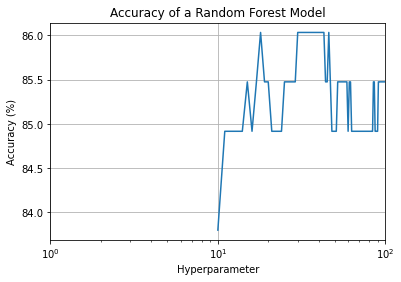

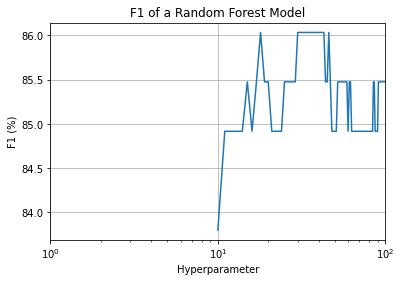

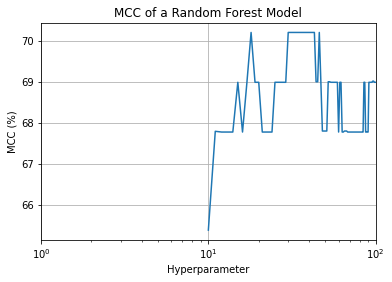

Maximos: 
F1:  8
MCC:  8
Valor:  18
Valor:  18


In [46]:
hyper_parameter_save = []
accuracy = []
f1 = []
mcc = []

for i in range(10,101):
    hyper_parameter = i
    hyper_parameter_save.append(hyper_parameter)
    clf = RandomForestClassifier(n_estimators=hyper_parameter,random_state=0) # Create model Random Forest
    clf.fit(X_train, y_train) # Training of model
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred)*100)
    f1.append(f1_score(y_test, y_pred, average='micro')*100)
    mcc.append(matthews_corrcoef(y_test, y_pred)*100)
print("Metrics of Random Forest Model:")
# Accuracy of a Random Forest Model
plt.semilogx(hyper_parameter_save, accuracy) # Plot accuracy vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('Accuracy (%)') # Set y label
plt.title('Accuracy of a Random Forest Model') # Set title
plt.xlim(1,100) # Set x limits
plt.grid() # On grid
plt.show() # Show graph
# F1 of a Random Forest Model
plt.semilogx(hyper_parameter_save, f1) # Plot F1 vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('F1 (%)') # Set y label
plt.title('F1 of a Random Forest Model') # Set title
plt.xlim(1,100) # Set x limits
plt.grid() # On grid
plt.show() # Show graph
# MCC of a Random Forest Model
plt.semilogx(hyper_parameter_save, mcc) # Plot mcc vs hyper_parameter_save
plt.xlabel('Hyperparameter') # Set x label
plt.ylabel('MCC (%)') # Set y label
plt.title('MCC of a Random Forest Model') # Set title
plt.xlim(1,100) # Set x limits
plt.grid() # On grid
plt.show() # Show graph

print("Maximos: ")
point_max_f1 = np.argmax(np.array(f1))
point_max_mcc = np.argmax(np.array(mcc))
print("F1: ", point_max_f1)
print("MCC: ", point_max_mcc)
print("Valor: ", hyper_parameter_save[point_max_f1])
print("Valor: ", hyper_parameter_save[point_max_mcc])

In [48]:
clf = RandomForestClassifier(random_state=0, n_estimators=18) # Create model Random Forest
clf.fit(X_train_pca, y_train) # Training of model
y_pred = clf.predict(X_test_pca)
print("Metrics of Random Forest Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of Random Forest Model:
Accuracy: 79.3296089385475%
F1: 79.3296089385475%
MCC: 55.61319478328775%


## Modelling Final: Implementation with Gaussian Naive Bayes Algorithm

In [476]:
hyper_parameter= 1.0
gnb = GaussianNB(var_smoothing=hyper_parameter) # Create model Naive Bayes Gaussian
gnb.fit(X_train, y_train) # Training of model
y_pred = gnb.predict(X_test)
print("Metrics of Naive Bayes Gaussian Model:")
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)*100) + "%")
print("F1: "+ str(f1_score(y_test, y_pred, average='micro')*100) + "%")
print("MCC: "+ str(matthews_corrcoef(y_test, y_pred)*100) + "%")

Metrics of Naive Bayes Gaussian Model:
Accuracy: 86.59217877094973%
F1: 86.59217877094973%
MCC: 71.5205608216001%
